 #Program to develop a regression model on an existing dataset


In [1]:
#importing different libraries

import pandas            as pd
import numpy             as np
import seaborn           as sea
import matplotlib.pyplot as plt
from math                                 import sqrt
from sklearn.datasets                     import load_boston
from sklearn.model_selection              import train_test_split        as tts
from sklearn                              import linear_model
from sklearn.metrics                      import mean_squared_error       as mse
from scipy                                import stats
from sklearn.preprocessing                import MinMaxScaler              as mms
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing                import StandardScaler            as ss 
from statsmodels.stats.stattools          import durbin_watson


In [2]:
#Loading Boston dataset from the sklearn.datasets

lv_boston = load_boston()

In [3]:
#Displaying the structure of dataset

print("Keys of boston dataset:{0}".format(lv_boston.keys()))
print("Description of boston dataset:{0}".format(lv_boston['DESCR']))
print("Feature Names:{0}".format(lv_boston['feature_names']))
print("Dimensions of data variables:{0}".format(lv_boston['data'].shape))
print("Dimensions of target variable:{0}".format(lv_boston['target'].shape))



Keys of boston dataset:dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Description of boston dataset:.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      in

In [4]:
#Creating a dataframe of Boston dataset

pd.set_option('display.max_columns', None)
lv_boston_df = pd.DataFrame(lv_boston.data,columns = lv_boston.feature_names)
lv_boston_df['MEDV'] = lv_boston.target

print(lv_boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [5]:
#Generating the same dataset using seed() function

np.random.seed(2000)

In [6]:
#Creating the training and test dataset

lv_training,lv_test = tts(lv_boston_df,test_size = 0.3 )

lv_x_trg = lv_training.drop('MEDV',axis = 1)
lv_y_trg = lv_training['MEDV']

lv_x_test = lv_test.drop('MEDV',axis = 1)
lv_y_test = lv_test['MEDV']


In [7]:
#Creating a linear regression model

lv_model = linear_model.LinearRegression()

In [8]:
#Train the model using the training set

lv_model.fit(lv_x_trg,lv_y_trg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Determining accuracy of the training set

print("Accuracy of Training dataset is :",lv_model.score(lv_x_trg,lv_y_trg))

Accuracy of Training dataset is : 0.7497329669344378


In [10]:
#Displaying equation coefficient and intercept

print('Value of Coefficients is: \n',lv_model.coef_)
print('Value of Intercept is:',lv_model.intercept_)

Value of Coefficients is: 
 [-1.03910566e-01  3.03790199e-02 -6.07304248e-02  1.22375885e+00
 -1.56868905e+01  3.82289411e+00 -3.70049661e-03 -1.35985060e+00
  2.70620421e-01 -1.04886675e-02 -1.04492769e+00  9.54682149e-03
 -4.70256905e-01]
Value of Intercept is: 36.67861963321768


In [11]:
#predict the output from test set

lv_predicted = lv_model.predict(lv_x_test)


In [12]:
#Determining root mean squared error

lv_rmselm = sqrt(mse(lv_y_test,lv_predicted))
print("The value of RMSE error is :",lv_rmselm)

The value of RMSE error is : 5.240437660983594


In [13]:
#Step 1-A:Understanding the dataset

print('Dimension of Boston data set:',lv_boston.data.shape)
print("Dimension of Target data set:",lv_boston.target.shape)

Dimension of Boston data set: (506, 13)
Dimension of Target data set: (506,)


In [14]:
#Determining the name of the columns

lv_columns = lv_boston.feature_names
print("The name of the columns are :\n",lv_columns)

The name of the columns are :
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [15]:
#Create the dataframe from available data

lv_boston_data_df_02 = pd.DataFrame(lv_boston.data)
lv_boston_data_df_02.columns = lv_columns
lv_boston_target_df = pd.DataFrame(lv_boston.target)

In [16]:
#Determining nature of variables

print("Details of variables in the dataset:\n",lv_boston_data_df_02.describe())

Details of variables in the dataset:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356

In [17]:
#Determining nature of single variable

print("The details of CHAS are:\n",lv_boston_data_df_02['CRIM'].describe())

The details of CHAS are:
 count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64


In [18]:
#Determining number of observations for each value of "CHAS"

print("The details of CHAS are:\n",lv_boston_data_df_02['CHAS'].value_counts())

The details of CHAS are:
 0.0    471
1.0     35
Name: CHAS, dtype: int64


-----------------------------COUNT PLOT--------------------


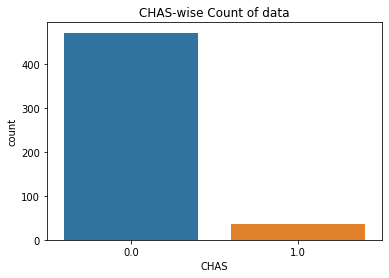

In [19]:
#Determining count in visual form using count plot

print("-----------------------------COUNT PLOT--------------------")
sea.countplot(x = 'CHAS',data = lv_boston_data_df_02).set_title('CHAS-wise Count of data')
plt.show()

----------------------COUNT PLOT-----------------------


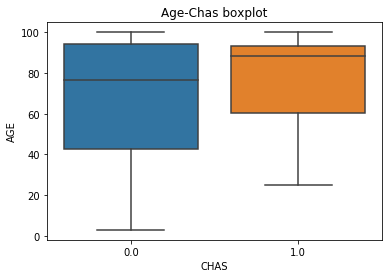

In [20]:
#Creating a box plot

print("----------------------COUNT PLOT-----------------------")
sea.boxplot(x = 'CHAS', y = 'AGE',data = lv_boston_data_df_02).set_title("Age-Chas boxplot")
plt.show()

---------------------DISTRIBUTION PLOT---------------


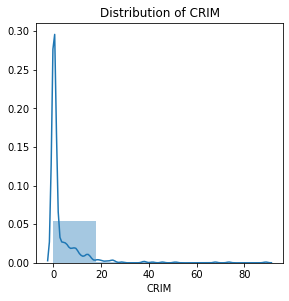

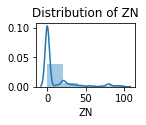

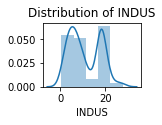

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

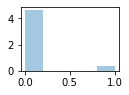

In [21]:
#Creating distribtion plot of Variables

print("---------------------DISTRIBUTION PLOT---------------")
plt.figure(1,figsize = (15,15))
lv_temp = 330
lv_string = "Distribution of "

for i in lv_boston_data_df_02.columns:
    lv_temp = lv_temp + 1
    plt.subplot(lv_temp)
    sea.distplot(lv_boston_data_df_02[i],bins = 5).set_title((lv_string + i))
    plt.show()
       





In [ ]:
print("---------------------DISTRIBUTION PLOT---------------")
plt.figure(1,figsize = (15,15))

plt.subplot(331)
sea.distplot(lv_boston_data_df_02["CRIM"],bins = 5).set_title("Distribution of CRIM")

plt.subplot(332)
sea.distplot(lv_boston_data_df_02["ZN"],bins = 5).set_title("Distribution of ZN")

plt.subplot(333)
sea.distplot(lv_boston_data_df_02["INDUS"],bins = 5).set_title("Distribution of INDUS")

plt.subplot(334)
sea.distplot(lv_boston_data_df_02["NOX"],bins = 5).set_title("Distribution of NOX")

plt.subplot(335)
sea.distplot(lv_boston_data_df_02["RM"],bins = 5).set_title("Distribution of RM")

plt.subplot(336)
sea.distplot(lv_boston_data_df_02["AGE"],bins = 5).set_title("Distribution of AGE")

plt.subplot(337)
sea.distplot(lv_boston_data_df_02["DIS"],bins = 5).set_title("Distribution of DIS")

plt.subplot(338)
sea.distplot(lv_boston_data_df_02["RAD"],bins = 5).set_title("Distribution of RAD")

plt.subplot(339)
sea.distplot(lv_boston_data_df_02["TAX"],bins = 5).set_title("Distribution of TAX")

plt.suptitle("Distribution Plot of Variables")
plt.show()

In [ ]:
#Creating Histogram of Variables :"PTRATIO,B and LSTAT"

print("-------------------------------------------------")
plt.figure(2,figsize=(15,5))

plt.subplot(131)
lv_boston_data_df_02["PTRATIO"].plot.hist(bins = 10).set_title("Histogram of 'PTATIO'")

plt.subplot(132)
lv_boston_data_df_02["B"].plot.hist(bins = 10).set_title("Histogram of 'B'")

plt.subplot(133)
lv_boston_data_df_02["LSTAT"].plot.hist(bins = 10).set_title("Histogram of 'LSTAT'")

plt.suptitle("Histogram of Variables")
plt.show()

In [ ]:
#Creating a heatmap of correlations
print("------------------------HEAT MAP-------------------")
sea.heatmap(lv_boston_data_df_02.corr(),annot=True,cmap = 'RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Heatmap of co-relation between variables', fontsize = 16)
plt.show()

In [ ]:
#Creating a scatter plot

print("------------------SCATTER PLOT--------------------")
sea.scatterplot(x = 'INDUS' , y = 'RM', hue = 'CHAS', data = lv_boston_data_df_02).set_title("Scatter plot of INDUS-RM")
plt.xlabel('INDUS')
plt.ylabel('RM')
plt.show()

In [ ]:
#Scatter pair plot considering kde as diagonal plot
print("------------------SCATTER PAIR PLOT------------------------")

sea.pairplot(lv_boston_data_df_02[['ZN','INDUS','RM','NOX','CRIM']],kind = 'scatter',
            diag_kind = 'kde')
plt.suptitle("Scatter PairPlot of Observations")
plt.show()

In [ ]:
#Regression pair plot considering histogram as diagonal plot
print("------------------REGRESSION PAIR PLOT------------------------")

sea.pairplot(lv_boston_data_df_02[['B','DIS','RAD','TAX','PTRATIO']],diag_kind = "hist",
            kind = 'reg')
plt.suptitle("Regression Pairplot of observations")
plt.show()

In [ ]:
#Step 1-B Determining missing values

print("Missing Values in the dataset:\n",lv_boston_data_df_02.isnull().sum())

In [ ]:
#Step 1-C: Assumptions check
#Step 1-C- Normality assumption : Determining normality of data

print("Skewness of data:\n",stats.skew(lv_boston.data))
print("Kurtosis of data:\n",stats.kurtosis(lv_boston.data))
print("Applying normality test:\n",stats.mstats.normaltest(lv_boston.data))
print("Applying Shapiro test:",stats.shapiro(lv_boston.data))



In [ ]:
#Determining outliers by calculating z-score

lv_zscore = np.abs(stats.zscore(lv_boston_data_df_02))
print("The z-score of data is:\n",lv_zscore)

In [ ]:
#Determining indexes where z-score is greather than 3
lv_outlierlist = np.where(lv_zscore > 3)
print("The indexes of outliers is:\n",lv_outlierlist[0])
print("The number of outliers is:",len(lv_outlierlist[0]))

In [ ]:
#Removing outliers from the dataset

lv_boston_data_df_new = lv_boston_data_df_02[(lv_zscore < 3).all(axis = 1)]
print("Dimension after removing outliers:",lv_boston_data_df_new.shape)




In [ ]:
#Removing corresponding rows from target dataset also

lv_boston.target = lv_boston_target_df.drop(index = lv_outlierlist[0])

In [ ]:

#Step 1-C: Multi Collinearity assumption: use of VIF

def vifresult(data):
    threshold = 4.0
    variables = list(range(data.shape[1]))
    deleted = True
    while deleted:
        deleted = False
        vifvalue = [vif(data.iloc[:,variables].values,ix)
        for ix in range(data.iloc[:,variables].shape[1])]
        maxvifloc = vifvalue.index(max(vifvalue))
        if max(vifvalue) > threshold:
            print('Deleting\''+ data.iloc[:,variables].columns[maxvifloc]+
                      '\'at index:'+str(maxvifloc))
        del variables[maxvifloc]
        delected = True
      
    print("Important predictor variables are:",data.columns[variables])
    return data.iloc[:,variables]

#Calling the above function and determine the new dimension
lv_boston.data = vifresult(lv_boston_data_df_02)
print("Dimension after multi collinearity assumption:",lv_boston.data.shape)

              

In [ ]:
#Step 1-C :Linearity Assumption : Use of correlation coefficient
#lv_boston.data
print("Spearman Correlation coefficient between crim and target:\n",
     stats.stats.spearmanr(lv_boston.data.iloc[1:417,0],
                          lv_boston.target[1:417]))
print("\n")

print("Spearman Correlation Coefficient between zn and target:\n",
     stats.stats.spearmanr(lv_boston.data.iloc[1:417,1],
                         lv_boston.target[1:417]))
print("\n")

print("Spearman Correlation Coefficient between indus and target:\n",
     stats.stats.spearmanr(lv_boston.data.iloc[1:417,2],
                          lv_boston.target[1:417]))

print("\n")

print("Spearman Correlation Coefficient between dis and target:\n",
     stats.stats.spearmanr(lv_boston.data.iloc[1:417,6],
                          lv_boston.target[1:417]))

In [ ]:
#Step 1-D: Feature Scaling

lv_sc = ss()
lv_boston.data = lv_sc.fit_transform(lv_boston.data)
print("Standard scaling is done on data set")

In [ ]:
#Step 2: Developing the model
#Using a random seed function for generating the same data set

#Creating training,test dataset for dependent and independent variables

np.random.seed(5000)

In [ ]:
#Creating training,test dataset for dependent and independent variables

lv_x_trg_02,lv_x_test_02,lv_y_trg_02,lv_y_test_02 = tts(lv_boston.data,
                                                          lv_boston.target,
                                                          random_state = 0 )

print("Dimension of training,test data set",lv_x_trg_02.shape,
                                             lv_x_test_02.shape)

In [ ]:
#Creating a Linear regression model on training dataset

lv_model_02 = linear_model.LinearRegression()

#Fit the Linear regression model using training dataset

lv_model_02.fit(lv_x_trg_02,lv_y_trg_02)

In [ ]:
#Equation coefficient and intercept of the model

print('Coefficient of independent variables:\n',lv_model_02.coef_)
print('Intercept in this model:',lv_model_02.intercept_)

In [ ]:
# Step 3: Predicting the model
#Make Prediction on test set

lv_pred = lv_model_02.predict(lv_x_test_02)

#Independence of error assumption: Using Durbin-Watson test

lv_resid = lv_y_test_02-lv_pred
print("Durbin Waston test:",durbin_watson(lv_resid))

In [ ]:
#Homoscedasticity assumption: plot between residuals , predicted values

plt.scatter(lv_pred,lv_resid)
plt.show()

In [ ]:
#Step 4: Determining accuracy of the model
#Calculate RMSE for the model

lv_rmse = sqrt(mse(lv_y_test_02,lv_pred))
print('RMSE value for Linear model is :',lv_rmse)